<h1 style = "font-size:3rem;color:orange">Pole Zero Plots</h1>

In [27]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa                    
import librosa.display
import scipy as sp

In [28]:
# insert coefficients
b = [0.5, 0.5]
a = [1]

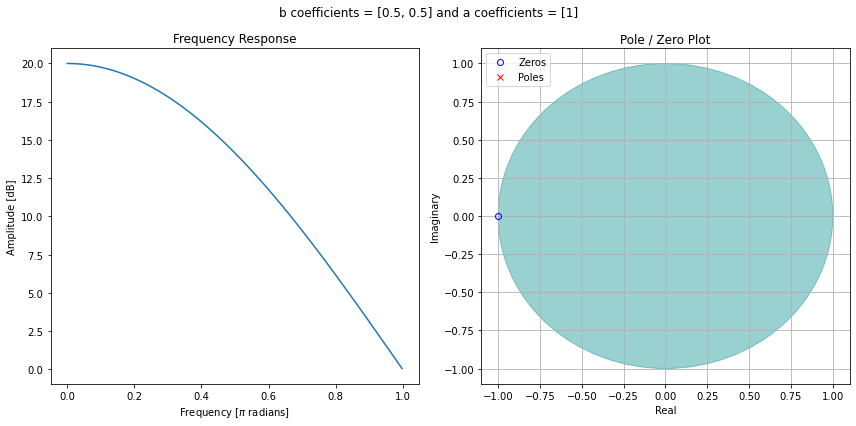

In [29]:
# plot both frequency response and pole zero plot
z, p, k = sp.signal.tf2zpk(b, a)
w, h = sp.signal.freqz(b,a)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
fig.suptitle(f'b coefficients = {b} and a coefficients = {a}')
#$H(e^(j\omega)) = \frac{%d}{%d}$' % (b, a)
ax1.plot(w / (np.pi),  20 * abs(h))
ax1.set_title('Frequency Response')
ax1.set_xlabel('Frequency [$\pi$ radians]')
ax1.set_ylabel('Amplitude [dB]')

unit_circle = plt.Circle((0, 0), 1, color='darkcyan', alpha=0.4) # used to plot the circle


ax2.plot(np.real(z), np.imag(z), 'ob', markerfacecolor='none')
ax2.plot(np.real(p), np.imag(p), 'xr')


plt.legend(['Zeros', 'Poles'], loc=2)
plt.title('Pole / Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid()
ax2.add_patch(unit_circle)
fig.tight_layout() 
plt.show()

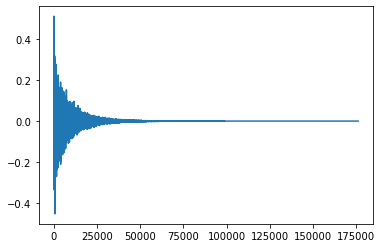

In [30]:
# Using Room Impulse Response
data , sr  = librosa.load('../samples/St_Nicolaes_Church.wav', mono=True)
plt.plot(data)

b = data[:120]
a = [1]

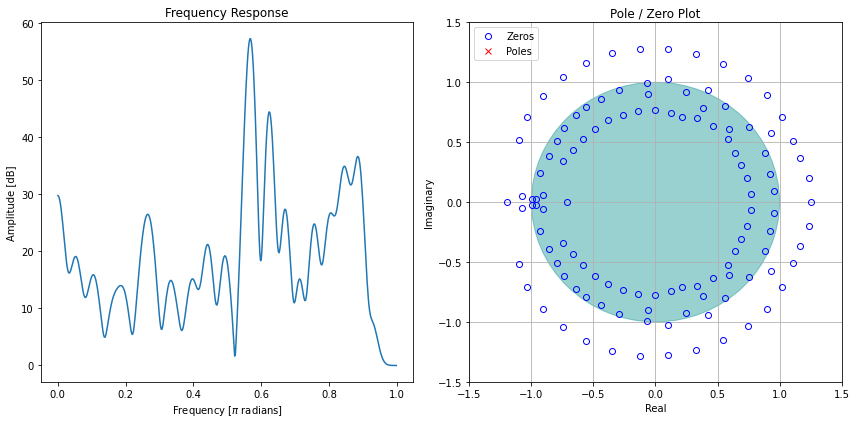

In [31]:
# plot both frequency response and pole zero plot
z, p, k = sp.signal.tf2zpk(b, a)
w, h = sp.signal.freqz(b,a)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
#fig.suptitle(f'b coefficients = {b} and a coefficients = {a}')
#$H(e^(j\omega)) = \frac{%d}{%d}$' % (b, a)
ax1.plot(w / (np.pi),  20 * abs(h))
ax1.set_title('Frequency Response')
ax1.set_xlabel('Frequency [$\pi$ radians]')
ax1.set_ylabel('Amplitude [dB]')

unit_circle = plt.Circle((0, 0), 1, color='darkcyan', alpha=0.4) # used to plot the circle


ax2.plot(np.real(z), np.imag(z), 'ob', markerfacecolor='none')
ax2.plot(np.real(p), np.imag(p), 'xr')


plt.legend(['Zeros', 'Poles'], loc=2)
plt.title('Pole / Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
ax2.add_patch(unit_circle)
fig.tight_layout() 
plt.show()

In [40]:
# Comparing butterworth filters

sr = 48000
c = [0.25, 0.5, 0.75]



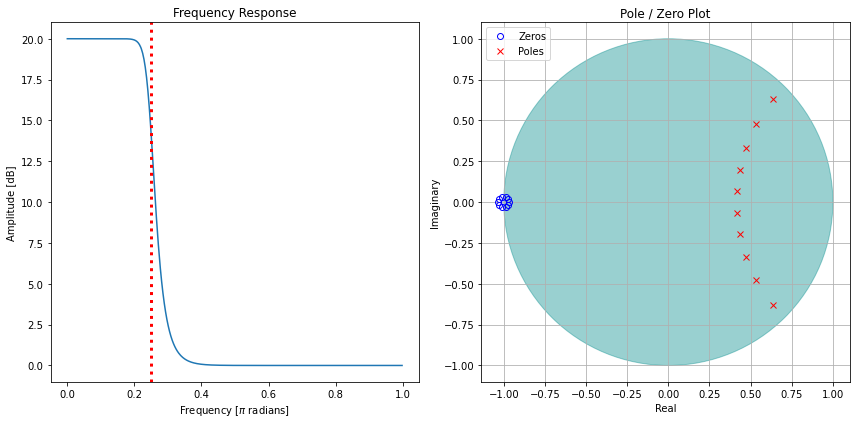

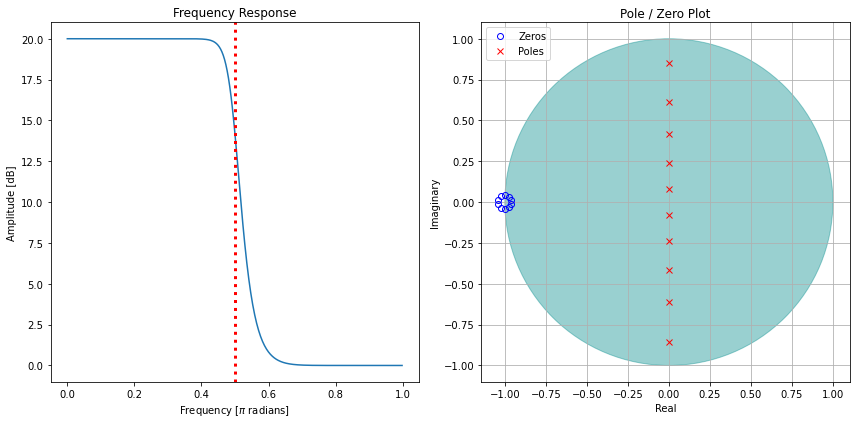

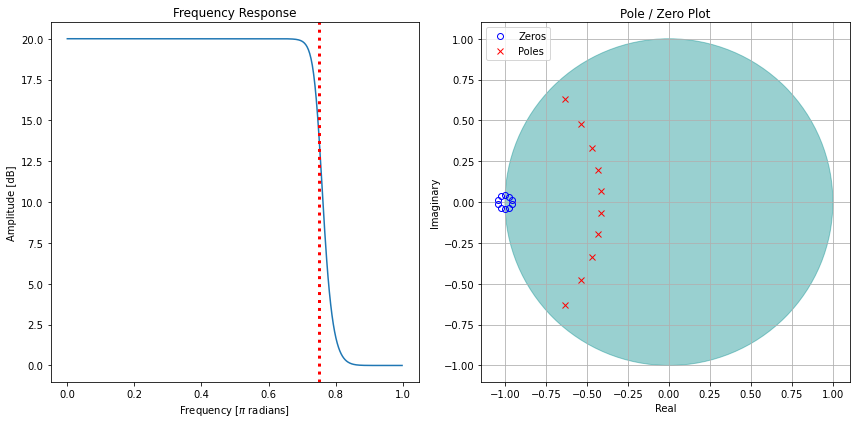

In [42]:

for i in range(0, 3):
    b, a = sp.signal.butter(10, c[i], btype='lowpass')
    w, h = sp.signal.freqz(b, a)
    z, p, k = sp.signal.tf2zpk(b, a)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)   
    #fig.suptitle(f'b coefficients = {b} and a coefficients = {a}')
    #$H(e^(j\omega)) = \frac{%d}{%d}$' % (b, a)
    ax1.plot(w / np.pi, 20 * abs(h))
    ax1.set_title('Frequency Response')
    ax1.set_xlabel('Frequency [$\pi$ radians]')
    ax1.set_ylabel('Amplitude [dB]')
    ax1.axvline(c[i], color='red', lw = '3', ls = 'dotted') # cutoff frequency

    unit_circle = plt.Circle((0, 0), 1, color='darkcyan', alpha=0.4) # used to plot the circle


    ax2.plot(np.real(z), np.imag(z), 'ob', markerfacecolor='none')
    ax2.plot(np.real(p), np.imag(p), 'xr')


    plt.legend(['Zeros', 'Poles'], loc=2)
    plt.title('Pole / Zero Plot')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    #plt.xlim([-1.5, 1.5])
    #plt.ylim([-1.5, 1.5])
    plt.grid()
    ax2.add_patch(unit_circle)

    fig.tight_layout() 
plt.show()